In [7]:
import pandas as pd

df = pd.read_csv("../output/analysis-val-exp012.csv").iloc[:, 1:]

In [10]:
df

image                                        predictions  \
0     230cbfe8a086f7.jpg  e8ac23241df5 new_individual 2c6dd2efff3b 3f070...   
1     2caa2997e6b9e3.jpg  e8ac23241df5 new_individual 2c6dd2efff3b 3f070...   
2     242024b0766c43.jpg  02947a94c3fc new_individual a6e325d8e924 938b7...   
3     5520a574fcc604.jpg  2280b5fcc6c2 new_individual 528c6ef62a74 c2924...   
4     6a00316b567f7b.jpg  90e2a0133e28 new_individual 735496dc7e64 8bc94...   
...                  ...                                                ...   
3355  b81f08e1361025.jpg  new_individual 3a79df6eeae8 fb5b875fad78 b8cea...   
3356  638e88f4866397.jpg  new_individual d902cfe4b55f 052ddb336380 dce3e...   
3357  4d7bb31f58d446.jpg  new_individual 238c85a17543 3423c4a03caf 72b84...   
3358  96af93c6eb4470.jpg  new_individual 955c91a54617 ec2da387873a fde1c...   
3359  12973f2f464268.jpg  new_individual 5a22aad0ac12 3d20802992a9 1cf49...   

                       species individual_id  
0           false_killer_whale  2c6dd2efff3b  
1           false_killer_whale  2c6dd2efff3b  
2           bottlenose_dolphin  a6e325d8e924  
3           false_killer_whale  528c6ef62a74  
4           bottlenose_dolphin  d03806a6d0cc  
...                        ...           ...  
3355                blue_whale  d6eb463c320f  
3356  short_finned_pilot_whale  ffd3e5bda0ba  
3357            humpback_whale  608585ea5129  
3358            humpback_whale  433d825e2486  
3359             dusky_dolphin  74b8b78e4e6a  

[3360 rows x 4 columns]

In [12]:
df["individual_id"].value_counts()

8ca0a04df7a1    4
e943980b7a98    3
51c1774c4f6e    3
86c20ead4674    3
528c6ef62a74    3
               ..
0841d451123b    1
481b3430c768    1
569656d38c0a    1
ecd354c01c8b    1
74b8b78e4e6a    1
Name: individual_id, Length: 3312, dtype: int64

In [13]:
df[df["individual_id"] == "8ca0a04df7a1"]

image                                        predictions  \
118  31693a01978e7d.jpg  7485701415cd new_individual c7e67bc287c4 8ca0a...   
177  3e134576ab1be1.jpg  7485701415cd new_individual c7e67bc287c4 37c7a...   
192  2f01c39444a632.jpg  7485701415cd new_individual c7e67bc287c4 37c7a...   
252  440b276f0c354a.jpg  7485701415cd new_individual c7e67bc287c4 37c7a...   

                species individual_id  
118  bottlenose_dolphin  8ca0a04df7a1  
177  bottlenose_dolphin  8ca0a04df7a1  
192  bottlenose_dolphin  8ca0a04df7a1  
252  bottlenose_dolphin  8ca0a04df7a1

In [14]:
target_df = df[df["individual_id"] == "8ca0a04df7a1"]

In [73]:
from pathlib import Path

input_path = Path("../input/happy-whale-and-dolphin-backfin")
input_path2 = Path("../input/happy-whale-and-dolphin")

def get_image(image):
    return input_path / "train_images" / image

target_df.loc[:, "image_path"] = target_df["image"].map(get_image)

/tmp/ipykernel_2767496/2371636059.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df.loc[:, "image_path"] = target_df["image"].map(get_image)


In [75]:
target_df

image                                        predictions  \
118  31693a01978e7d.jpg  7485701415cd new_individual c7e67bc287c4 8ca0a...   
177  3e134576ab1be1.jpg  7485701415cd new_individual c7e67bc287c4 37c7a...   
192  2f01c39444a632.jpg  7485701415cd new_individual c7e67bc287c4 37c7a...   
252  440b276f0c354a.jpg  7485701415cd new_individual c7e67bc287c4 37c7a...   

                species individual_id  \
118  bottlenose_dolphin  8ca0a04df7a1   
177  bottlenose_dolphin  8ca0a04df7a1   
192  bottlenose_dolphin  8ca0a04df7a1   
252  bottlenose_dolphin  8ca0a04df7a1   

                                            image_path  
118  ../input/happy-whale-and-dolphin-backfin/train...  
177  ../input/happy-whale-and-dolphin-backfin/train...  
192  ../input/happy-whale-and-dolphin-backfin/train...  
252  ../input/happy-whale-and-dolphin-backfin/train...

In [77]:
import matplotlib.pyplot as plt
import cv2


def plot_img(img):
    # print(img)
    img = cv2.imread(img)
    # print(img.shape)
    plt.imshow(img)
    plt.show()

Prediciotns:  7485701415cd new_individual c7e67bc287c4 8ca0a04df7a1 be330f0c495c
Target:  8ca0a04df7a1


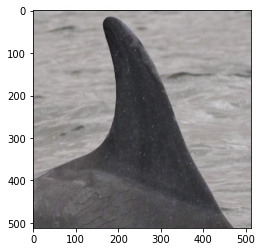

Prediciotns:  7485701415cd new_individual c7e67bc287c4 37c7aba965a5 250c3fdb9da6
Target:  8ca0a04df7a1


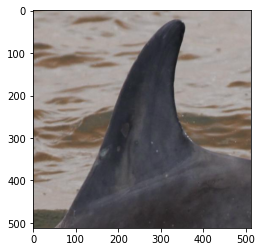

Prediciotns:  7485701415cd new_individual c7e67bc287c4 37c7aba965a5 250c3fdb9da6
Target:  8ca0a04df7a1


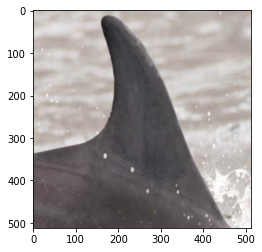

Prediciotns:  7485701415cd new_individual c7e67bc287c4 37c7aba965a5 250c3fdb9da6
Target:  8ca0a04df7a1


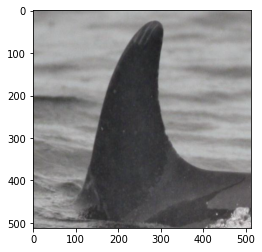

In [79]:
for i, j, k in zip(target_df["image_path"].to_numpy(), target_df["predictions"].to_numpy(), target_df["individual_id"].to_numpy()):
    print("Prediciotns: ", j)
    print("Target: ", k)
    plot_img(str(i))

In [80]:
train_df = pd.read_csv(input_path2 / "train.csv")

In [94]:
t = "7485701415cd"
t_df = train_df[train_df["individual_id"] == t]
t_df.loc[:, "image_path"] = t_df["image"].map(get_image)

def plot(target, image_path):
    for i, k in zip(target, image_path):
        print("target: ", i)
        print("image_path: ", k)
        plot_img(str(k))

/tmp/ipykernel_2767496/594428594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df.loc[:, "image_path"] = t_df["image"].map(get_image)


In [95]:
t_df

image             species individual_id  \
818    0437691af72c47.jpg  bottlenose_dolphin  7485701415cd   
1445   077a8bbf9c79e6.jpg  bottlenose_dolphin  7485701415cd   
1647   087d75750fb261.jpg  bottlenose_dolphin  7485701415cd   
2225   0b64cf79dbdb3d.jpg  bottlenose_dolphin  7485701415cd   
3895   13a094cf21b7f5.jpg  bottlenose_dolphin  7485701415cd   
...                   ...                 ...           ...   
46517  e9f5e0d47bb042.jpg  bottlenose_dolphin  7485701415cd   
47666  ef5c42d601335b.jpg  bottlenose_dolphin  7485701415cd   
48803  f4e7b8ae41e0ad.jpg  bottlenose_dolphin  7485701415cd   
49925  fa63030b0cfb4c.jpg  bottlenose_dolphin  7485701415cd   
50340  fc7f4ae8f6c45c.jpg  bottlenose_dolphin  7485701415cd   

                                              image_path  
818    ../input/happy-whale-and-dolphin-backfin/train...  
1445   ../input/happy-whale-and-dolphin-backfin/train...  
1647   ../input/happy-whale-and-dolphin-backfin/train...  
2225   ../input/happy-whale-and-dolphin-backfin/train...  
3895   ../input/happy-whale-and-dolphin-backfin/train...  
...                                                  ...  
46517  ../input/happy-whale-and-dolphin-backfin/train...  
47666  ../input/happy-whale-and-dolphin-backfin/train...  
48803  ../input/happy-whale-and-dolphin-backfin/train...  
49925  ../input/happy-whale-and-dolphin-backfin/train...  
50340  ../input/happy-whale-and-dolphin-backfin/train...  

[80 rows x 4 columns]

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/0437691af72c47.jpg


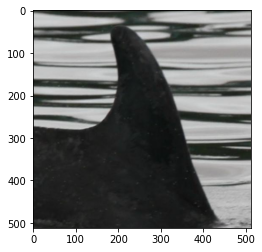

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/077a8bbf9c79e6.jpg


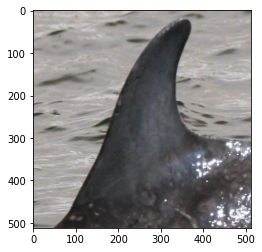

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/087d75750fb261.jpg


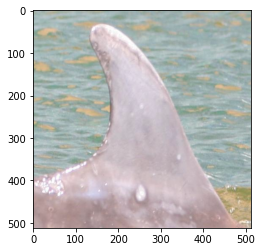

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/0b64cf79dbdb3d.jpg


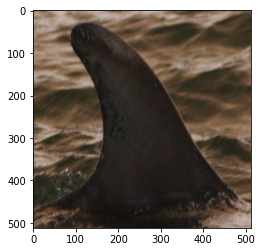

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/13a094cf21b7f5.jpg


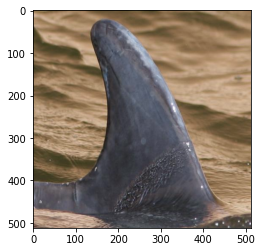

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/14d45dfd9237b9.jpg


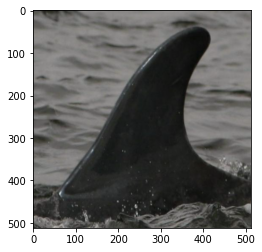

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/14fd72e0a24bd7.jpg


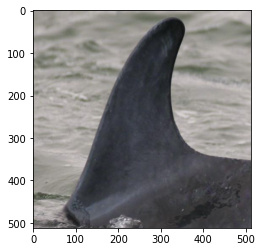

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/14ff23111b694f.jpg


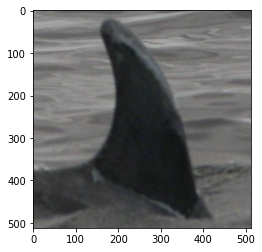

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/16bef0ee251923.jpg


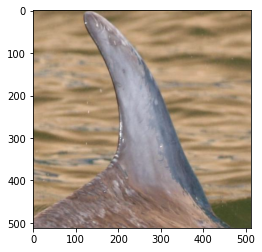

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/1b2a49f476f219.jpg


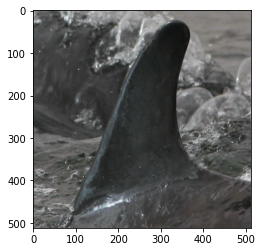

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/2173ef656bcc8c.jpg


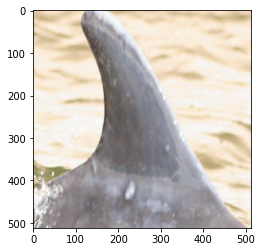

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/23f4844ec9e017.jpg


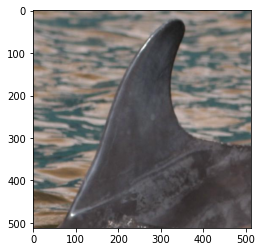

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/26ae45fe5da569.jpg


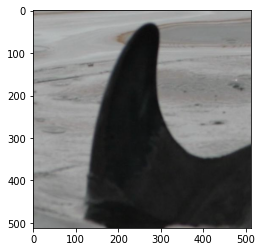

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/279d55d70a8fa2.jpg


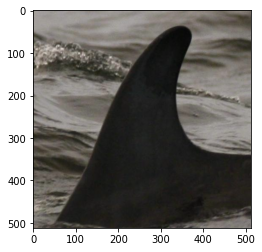

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/27db25dff915d0.jpg


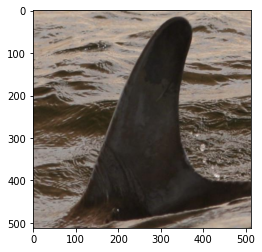

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/2d328a838ad81e.jpg


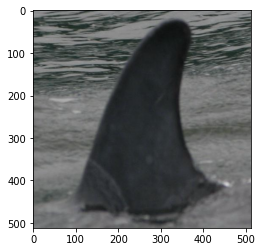

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/324952197bc2db.jpg


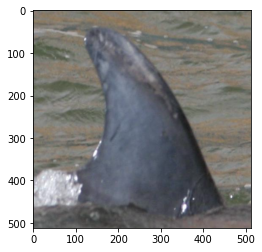

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/347b487355a1f7.jpg


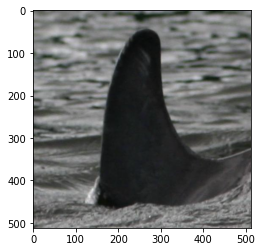

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/36427fad263cf1.jpg


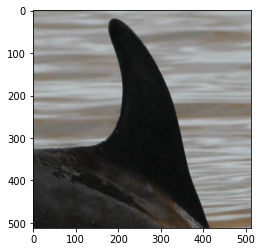

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/394278f8a5ef05.jpg


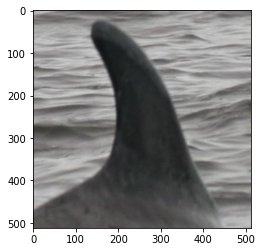

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/432e89c0e20443.jpg


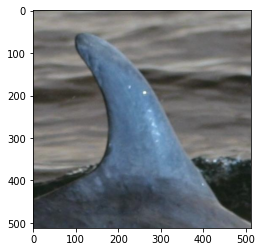

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/44b953a127996b.jpg


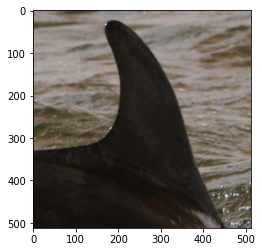

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/45b6695b4b499d.jpg


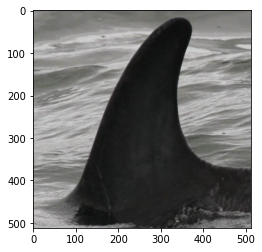

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/45c6c594bef8c5.jpg


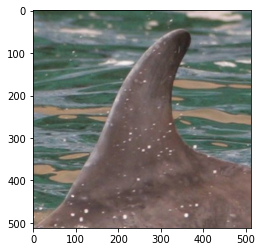

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/4eb15fda99ffe7.jpg


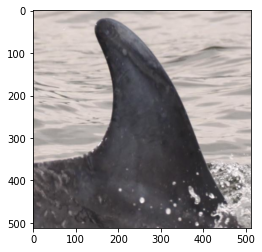

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/53903e768283ac.jpg


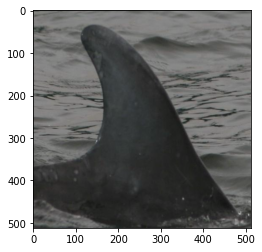

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/55e16c851523ad.jpg


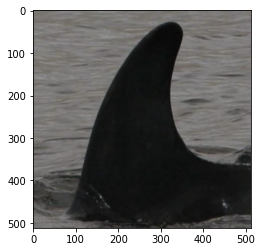

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/5dd2d65b01bbff.jpg


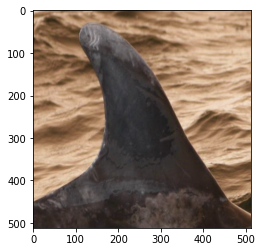

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/61170575db9b0e.jpg


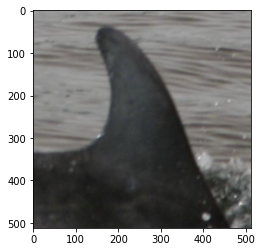

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/62893cc7ec444c.jpg


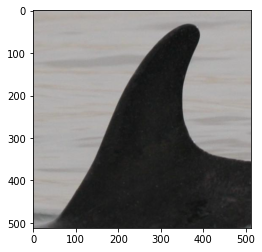

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/6427dfe5e8b93a.jpg


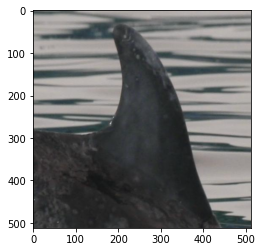

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/67584920af3a42.jpg


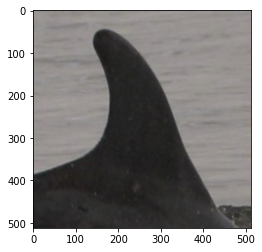

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/70f67db43e6205.jpg


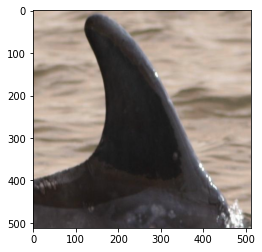

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/74292d94332a00.jpg


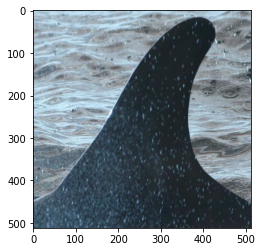

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/75d275271ac9fb.jpg


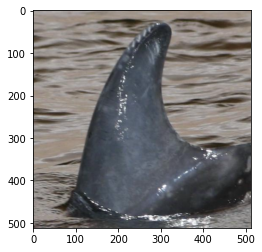

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/766595e7becd3e.jpg


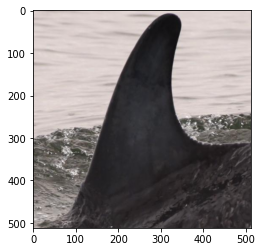

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/7855f3dce12d9a.jpg


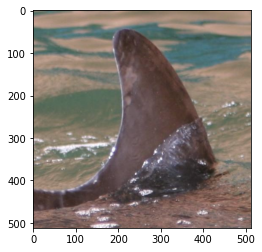

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/82c783bc874bbb.jpg


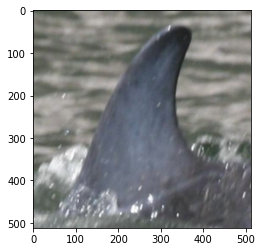

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/838d1cbe39db99.jpg


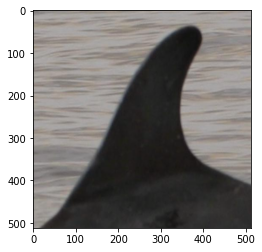

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/85d49e885d03e7.jpg


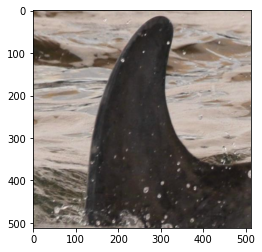

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/864189cdce6fd3.jpg


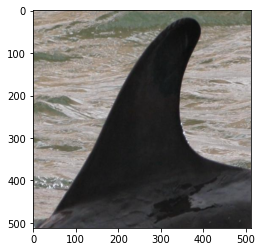

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/86f54a562f1f6e.jpg


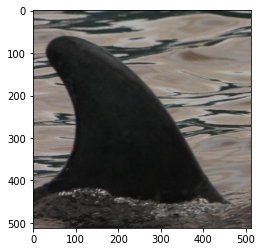

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/88adb9eee67089.jpg


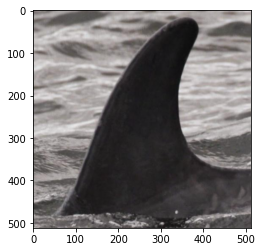

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/89fa55cf1a6cd7.jpg


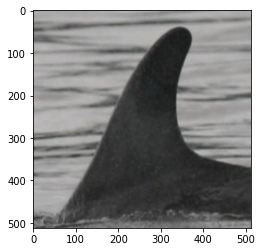

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/8a48463f8b3a86.jpg


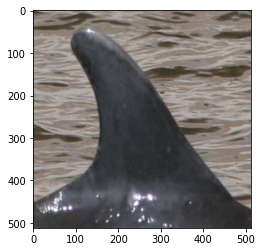

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/8b7ce8a8e1ceaa.jpg


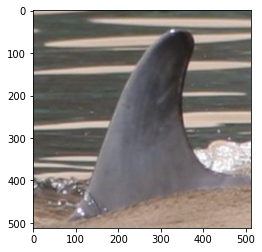

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/936ef9ab4908d7.jpg


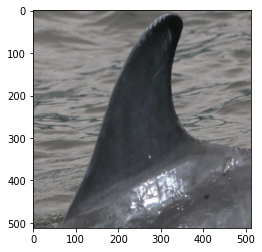

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/993520ca193f60.jpg


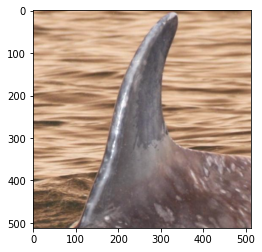

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/99739269c85805.jpg


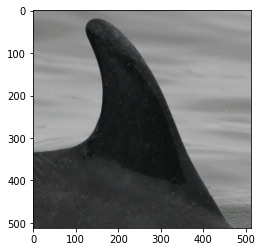

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/a0412c36d89f43.jpg


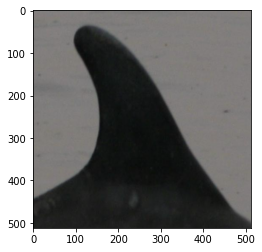

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/a09fc0fc80c443.jpg


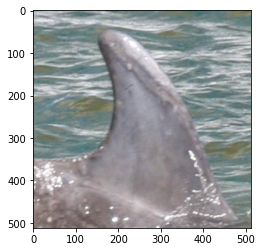

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/a3c54146aa62b2.jpg


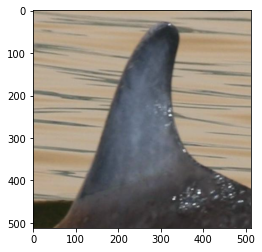

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/a3d81cfe197dd6.jpg


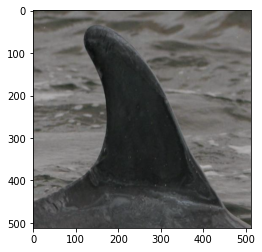

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/a9fd39e1f869ff.jpg


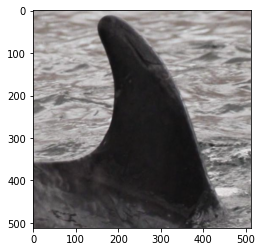

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/afcca8e5336aec.jpg


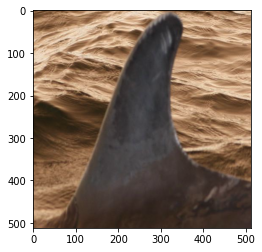

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/b1a04338c4efda.jpg


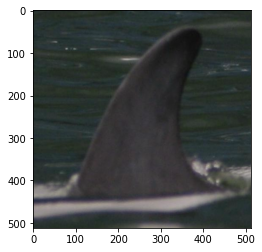

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/b25e8286d77bdd.jpg


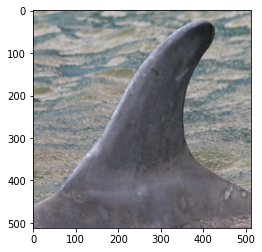

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/b2ecda69c93ac9.jpg


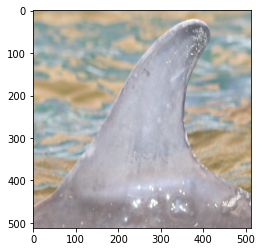

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/b2fccbded36a93.jpg


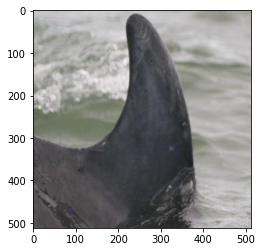

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/b38aac7819d43f.jpg


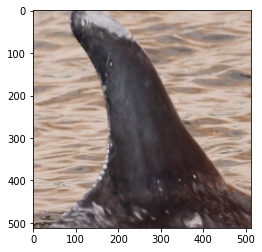

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/b3a7371704d213.jpg


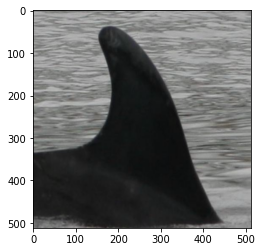

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/b7cc053fe76bbc.jpg


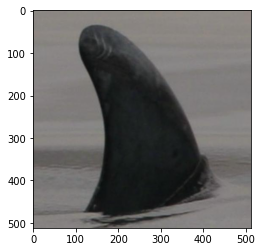

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/bb5ac0ad0cf377.jpg


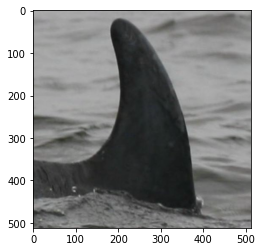

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/bc2d0d6d1f5eb8.jpg


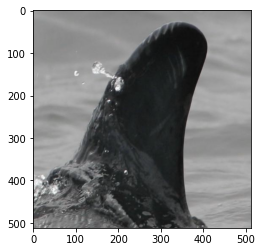

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/c0410973a6a60d.jpg


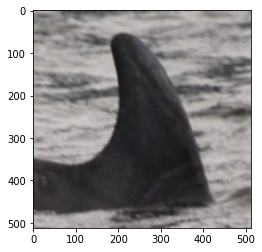

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/c04e4f4ad3124c.jpg


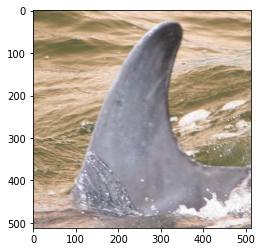

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/c5d329076c66bd.jpg


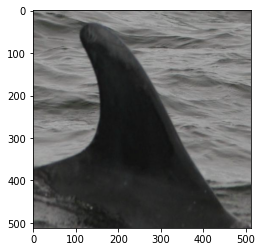

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/c6905315d67cf5.jpg


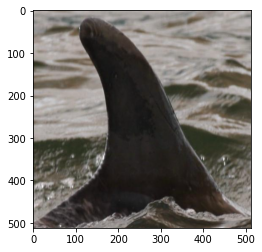

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/cef6372fae3b3b.jpg


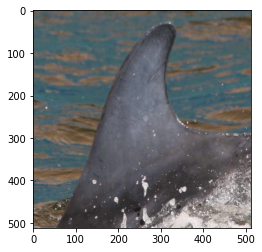

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/d00f17be80a300.jpg


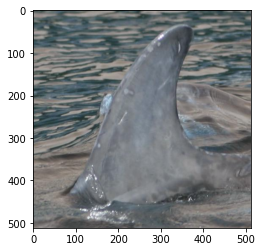

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/d4fe7d495dae01.jpg


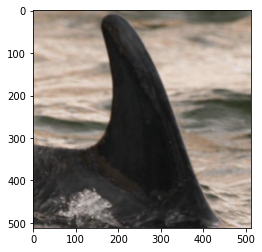

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/d88709943401a6.jpg


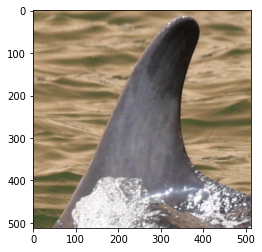

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/dd06a1eb5f8995.jpg


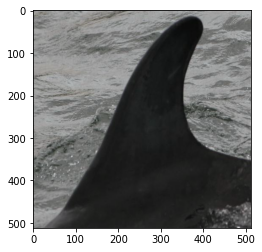

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/e4bf24b861da9d.jpg


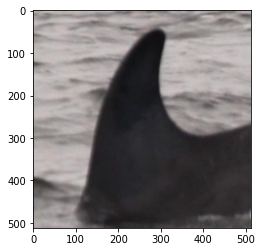

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/e90db95fae3074.jpg


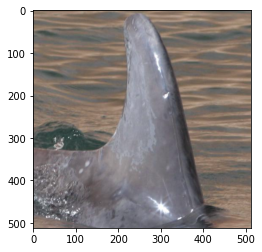

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/e9f5e0d47bb042.jpg


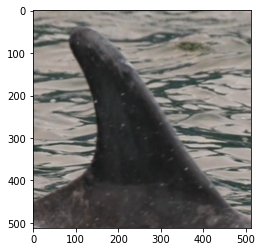

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/ef5c42d601335b.jpg


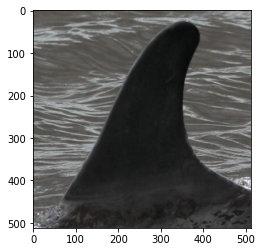

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/f4e7b8ae41e0ad.jpg


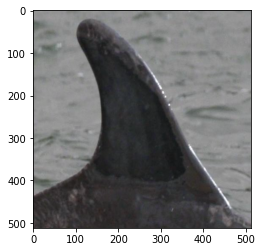

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/fa63030b0cfb4c.jpg


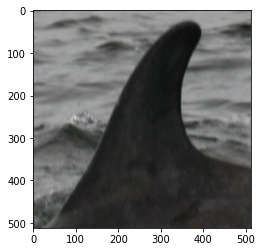

target:  7485701415cd
image_path:  ../input/happy-whale-and-dolphin-backfin/train_images/fc7f4ae8f6c45c.jpg


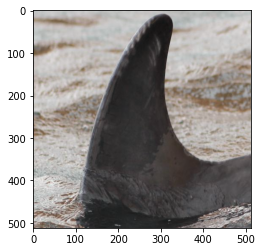

In [96]:
plot(t_df["individual_id"], t_df["image_path"])